# Data Pre-processing for WatchMetro: An Interactive Dashboard for Metro Manila Traffic Incidents  

This notebook will cover both EDA and cleaning for the dataset for the WatchMetro Dashboard.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...
1,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313462477459...
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...
3,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313590696535...
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17312 entries, 0 to 17311
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           17312 non-null  object 
 1   Time           17190 non-null  object 
 2   City           17125 non-null  object 
 3   Location       17289 non-null  object 
 4   Latitude       17312 non-null  float64
 5   Longitude      17312 non-null  float64
 6   High_Accuracy  17312 non-null  int64  
 7   Direction      16455 non-null  object 
 8   Type           17255 non-null  object 
 9   Lanes_Blocked  16625 non-null  float64
 10  Involved       16880 non-null  object 
 11  Tweet          17312 non-null  object 
 12  Source         17312 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.7+ MB


In [33]:
# View earliest and latest date
print(df['Date'].min())
print(df['Date'].max())

2018-08-20
2020-12-27


In [4]:
# Check for nulls
df.isnull().sum()

,0
Date,0
Time,122
City,187
Location,23
Latitude,0
Longitude,0
High_Accuracy,0
Direction,857
Type,57
Lanes_Blocked,687


In [5]:
# View rows with null Direction
df[df['Direction'].isnull()]

,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
48,2018-08-22,2:01 PM,Quezon City,ELLIPTICAL,14.654240,121.049788,1,NaN,STALLED JEEP DUE TO MECHANICAL DEFECT,1.0,JEEP,MMDA ALERT: Stalled jeep due to mechanical def...,https://twitter.com/mmda/status/10321487859027...
50,2018-08-22,2:13 PM,Quezon City,ELLIPTICAL,14.654240,121.049788,1,NaN,VEHICULAR ACCIDENT,1.0,VAN AND CAR,MMDA ALERT: Vehicular accident at Elliptical R...,https://twitter.com/mmda/status/10321515727828...
56,2018-08-22,3:31 PM,Quezon City,EDSA MONTE DE PIEDAD,14.623850,121.049123,1,NaN,STALLED BUS DUE TO MECHANICAL DEFECT,1.0,BUS,MMDA ALERT: Stalled bus due to mechanical defe...,https://twitter.com/mmda/status/10321798171882...
67,2018-08-22,12:07 AM,Quezon City,COMMONWEALTH LUZON,14.665330,121.070469,1,NaN,VEHICULAR ACCIDENT,1.0,MC AND CAR,MMDA ALERT: Vehicular accident at Commonwealth...,https://twitter.com/mmda/status/10323012667669...
69,2018-08-22,5:13 AM,Makati City,ORTIGAS GREENHILLS,14.566348,121.048658,1,NaN,STALLED DUMP TRUCK DUE TO MECHANICAL PROBLEM,1.0,DUMP TRUCK,MMDA ALERT: Stalled dump truck due to mechanic...,https://twitter.com/mmda/status/10323783911046...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17209,2020-12-16,9:12 AM,Makati City,C5 KATIPUNAN AVE OLD BALARA,14.559503,121.065437,1,NaN,STALLED AUV DUE TO MECHANICAL PROBLEM,1.0,AUV,MMDA ALERT: STALLED AUV DUE TO MECHANICAL PROB...,https://twitter.com/mmda/status/13390234960729...
17221,2020-12-17,10:26 AM,Pasig City,ORTIGAS AVE VALLE VERDE 4,14.588997,121.068838,1,NaN,VEHICULAR ACCIDENT,1.0,TRUCK AND CLOSED VAN,MMDA ALERT: VEHICULAR ACCIDENT AT ORTIGAS AVE....,https://twitter.com/mmda/status/13394031545598...
17245,2020-12-18,9:33 PM,Quezon City,EDSA AUROA,14.621564,121.050149,1,NaN,VEHICULAR ACCIDENT,1.0,BUS AND VAN,MMDA ALERT: VEHICULAR ACCIDENT AT EDSA AUROA I...,https://twitter.com/mmda/status/13399272796950...
17282,2020-12-23,11:56 AM,Quezon City,QUEZON AVE SCOUT ALBANO ST,14.641357,121.032867,1,NaN,VEHICULAR ACCIDENT,1.0,AUV AND CAR,"MMDA ALERT: VEHICULAR ACCIDENT AT QUEZON AVE.,...",https://twitter.com/mmda/status/13416054706209...


Since direction will not be used, it will be okay to keep it

In [6]:
# Keep rows with null Direction and delete rows with null everywhere else
df = df.dropna(subset=['City','Location','Type'])
df.shape

(17078, 13)

In [7]:
df.isnull().sum()

,0
Date,0
Time,115
City,0
Location,0
Latitude,0
Longitude,0
High_Accuracy,0
Direction,836
Type,0
Lanes_Blocked,664


In [8]:
# Drop rows where Type is null
df = df.dropna(subset=['Type'])
df.shape

(17078, 13)

Now, since the dashboard aims to be useful for people exploring areas prone to severe accidents such as collisions, we'll explore what is contained in the "Type" column.

In [9]:
# View rows with Type containing "collision"
df[df['Type'].str.lower().str.contains('collision')].shape

(635, 13)

In [10]:
# View rows with Type containing "stalled"
df[df['Type'].str.lower().str.contains('stalled')].shape

(3904, 13)

In [11]:
df[df['Type'].str.lower().str.contains('accident')].head()

,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...
6,2018-08-20,12:33 PM,Quezon City,EDSA ORTIGAS ROBINSONS,14.592515,121.058225,1,NB,VEHICULAR ACCIDENT,1.0,CAR AND BUS,MMDA ALERT: Vehicular accident at EDSA Ortigas...,https://twitter.com/mmda/status/10314003049173...
9,2018-08-20,2:51 PM,Quezon City,EDSA FARMERS,14.619717,121.050978,1,NB,VEHICULAR ACCIDENT,1.0,BUS AND CAR,MMDA ALERT: Vehicular accident at EDSA Farmers...,https://twitter.com/mmda/status/10314355107937...


In [12]:
# See all values in Type
df['Type'].unique()

array(['VEHICULAR ACCIDENT', 'STALLED L300 DUE TO MECHANICAL PROBLEM',
       'VEHICULAR ON FIRE', 'MULTIPLE COLLISION',
       'STALLED TRUCK DUE TO MECHANICAL PROBLEM',
       'MULTIPLE COLLISION C5ENEO KAT',
       'STALLED BUS DUE TO MECHANICAL DEFECT',
       'STALLED CLOSED VAN DUE TO MECHANICAL DEFECT',
       'STALLED BUS DUE TO MECHANICAL PROBLEM',
       'ONGOING DPWH ROAD PATCHING', 'ONGOING DPWH FOOTBRIDGE PAINTING',
       'ONGOING DPWH ASPHALT LAYING',
       'STALLED VAN DUE TO MECHANICAL PROBLEM',
       'STALLED JEEP DUE TO MECHANICAL DEFECT',
       'STALLED TRUCK DUE TO MECHANICAL DEFECT',
       'STALLED TRUCK DUE TO MECHANICAL DEFECT KATIPUNAN',
       'VEHICULAR ACCIDENT COMMONWEALTH', 'VEHICULAR ACCIDENT KAT',
       'STALLED CAR DUE TO FLAT TIRE',
       'STALLED DUMP TRUCK DUE TO MECHANICAL PROBLEM',
       'STALLED CAR DUE TO MECHANICAL PROBLEM',
       'ONGOING ANTI SMOKE BELCHING OPERATION',
       'STALLED VAN DUE TO FLAT TIRE',
       'STALLED TAXI DUE TO 

Since including incidents caused by mechanical failure or road maintenance does not seem conducive to the dashboard's goal of visualizing risk, we will only include rows pertaining to collision or accident

In [13]:
# keep only rows containing the word "collision" or "accident"
df = df[df['Type'].str.lower().str.contains('collision') | df['Type'].str.lower().str.contains('accident')]
df.shape

(12633, 13)

In [14]:
df.head()


,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...
6,2018-08-20,12:33 PM,Quezon City,EDSA ORTIGAS ROBINSONS,14.592515,121.058225,1,NB,VEHICULAR ACCIDENT,1.0,CAR AND BUS,MMDA ALERT: Vehicular accident at EDSA Ortigas...,https://twitter.com/mmda/status/10314003049173...
7,2018-08-20,12:39 PM,Mandaluyong,EDSA LIGHT MALL,14.574014,121.048410,1,NB,MULTIPLE COLLISION,2.0,3 CARS,MMDA ALERT: Multiple collision at EDSA Light M...,https://twitter.com/mmda/status/10314025050311...


Next, we'll explore Involved to see what we can do with it.

In [15]:
df['Involved'].unique()

array(['TAXI AND MC', 'SUV AND L300', '2 CARS', ...,
       'ELF TRUCK, MOTORCYCLE AND CAR ', "2- CAR'S ",
       'MOTORCYCLE, SUV AND TAXI '], dtype=object)

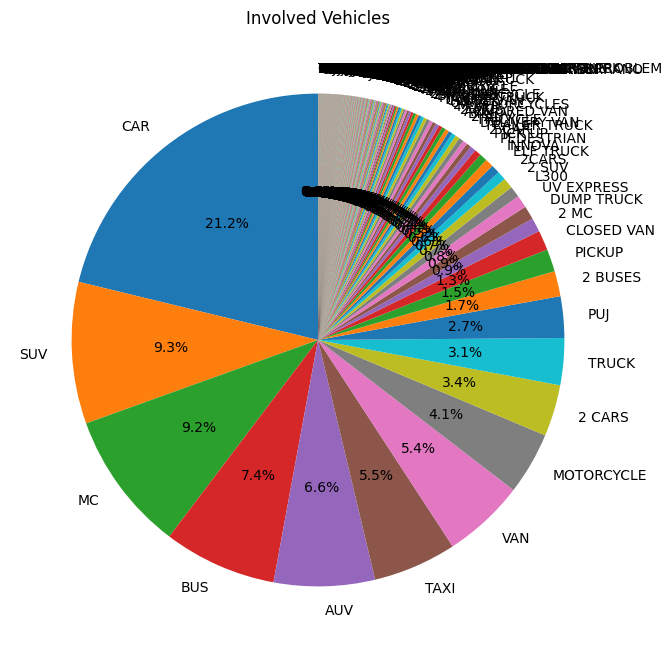

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: normalize text
df['Involved'] = df['Involved'].str.upper().str.replace(r"[^A-Z0-9\s]", "", regex=True)

# Split each row into separate vehicles
vehicles_series = df['Involved'].str.split(r"\s+AND\s+|\s*,\s*").explode()

# Strip whitespace
vehicles_series = vehicles_series.str.strip()

# Count occurrences
vehicle_counts = vehicles_series.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Involved Vehicles')
plt.show()


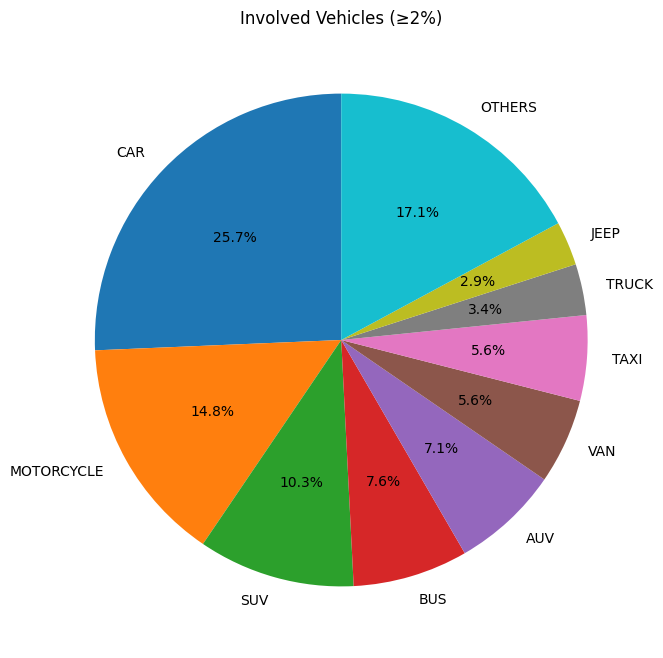

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Example: normalize text
def clean_vehicle_name(name):
    if not isinstance(name, str):
        return None  # Return None for non-string values (like NaN)
    name = name.strip().upper()
    name = re.sub(r"[^A-Z0-9\s]", "", name)  # remove punctuation
    name = re.sub(r"\b\d+\s*", "", name)     # remove numbers like '2 ' or '3-'

    # Apply abbreviation mapping
    vehicle_map = {
        'BU': 'BUS',
        'MC': 'MOTORCYCLE',
        'PUJ': 'JEEP'
    }
    if name in vehicle_map:
        name = vehicle_map[name]

    # Remove trailing S for plurals (except BUS)
    if name.endswith('S') and name != 'BUS':
        name = name[:-1]

    return name

# Ensure 'Involved' is string type before cleaning and splitting
df['Involved'] = df['Involved'].astype(str)

# Clean the whole column first
df['Involved'] = df['Involved'].str.upper().str.replace(r"[^A-Z0-9\s,]", "", regex=True)


# Split into list (handles 'AND' or commas)
vehicles_series = df['Involved'].str.split(r"\s+AND\s+|\s*,\s*").explode()

# Clean each vehicle name
vehicles_series = vehicles_series.apply(clean_vehicle_name)

# Drop any None values that resulted from non-string inputs
vehicles_series = vehicles_series.dropna()

# Count occurrences
vehicle_counts = vehicles_series.value_counts()

# Percentages
percentages = vehicle_counts / vehicle_counts.sum()

# Filter ≥2%, merge the rest into OTHERS
vehicle_counts_filtered = vehicle_counts[percentages >= 0.02].copy() # Use .copy() to avoid SettingWithCopyWarning
others_count = vehicle_counts[percentages < 0.02].sum()
if others_count > 0:
    vehicle_counts_filtered['OTHERS'] = others_count

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_counts_filtered, labels=vehicle_counts_filtered.index, autopct='%1.1f%%', startangle=90)
plt.title('Involved Vehicles (≥2%)')
plt.show()

Note that AUV and SUV are also a type of car. Sadly, MMDA is inconsistent with how they report the make of the car

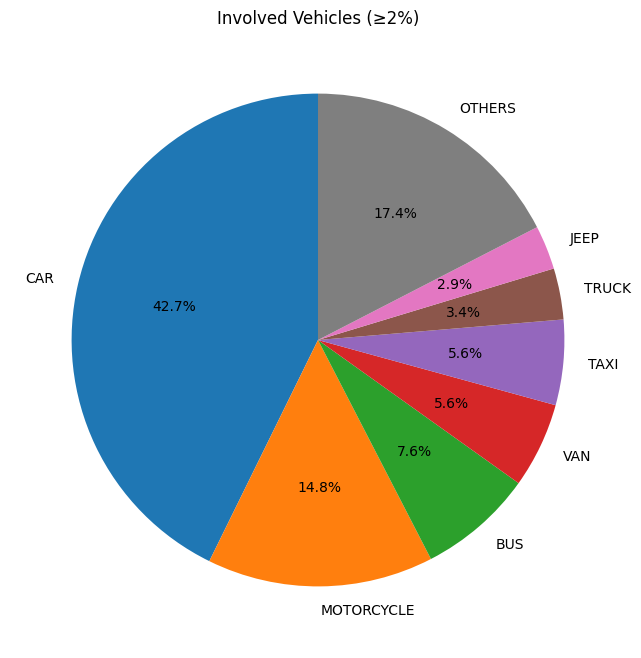

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Example: normalize text
def clean_vehicle_name(name):
    if not isinstance(name, str):
        return None  # Return None for non-string values (like NaN)
    name = name.strip().upper()
    name = re.sub(r"[^A-Z0-9\s]", "", name)  # remove punctuation
    name = re.sub(r"\b\d+\s*", "", name)     # remove numbers like '2 ' or '3-'

    # Apply abbreviation mapping
    vehicle_map = {
        'BU': 'BUS',
        'MC': 'MOTORCYCLE',
        'PUJ': 'JEEP',
        'AUV': 'CAR',
        'SUV': 'CAR'
    }
    if name in vehicle_map:
        name = vehicle_map[name]

    # Remove trailing S for plurals (except BUS)
    if name.endswith('S') and name != 'BUS':
        name = name[:-1]

    return name

# Ensure 'Involved' is string type before cleaning and splitting
df['Involved'] = df['Involved'].astype(str)

# Clean the whole column first
df['Involved'] = df['Involved'].str.upper().str.replace(r"[^A-Z0-9\s,]", "", regex=True)


# Split into list (handles 'AND' or commas)
vehicles_series = df['Involved'].str.split(r"\s+AND\s+|\s*,\s*").explode()

# Clean each vehicle name
vehicles_series = vehicles_series.apply(clean_vehicle_name)

# Drop any None values that resulted from non-string inputs
vehicles_series = vehicles_series.dropna()

# Count occurrences
vehicle_counts = vehicles_series.value_counts()

# Percentages
percentages = vehicle_counts / vehicle_counts.sum()

# Filter ≥2%, merge the rest into OTHERS
vehicle_counts_filtered = vehicle_counts[percentages >= 0.02].copy() # Use .copy() to avoid SettingWithCopyWarning
others_count = vehicle_counts[percentages < 0.02].sum()
if others_count > 0:
    vehicle_counts_filtered['OTHERS'] = others_count

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_counts_filtered, labels=vehicle_counts_filtered.index, autopct='%1.1f%%', startangle=90)
plt.title('Involved Vehicles (≥2%)')
plt.show()

Since pie chart in web page will be pretty small, pie chart above will be preferred.

In [19]:
df.shape

(12633, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12633 entries, 0 to 17311
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12633 non-null  object 
 1   Time           12549 non-null  object 
 2   City           12633 non-null  object 
 3   Location       12633 non-null  object 
 4   Latitude       12633 non-null  float64
 5   Longitude      12633 non-null  float64
 6   High_Accuracy  12633 non-null  int64  
 7   Direction      12052 non-null  object 
 8   Type           12633 non-null  object 
 9   Lanes_Blocked  12152 non-null  float64
 10  Involved       12633 non-null  object 
 11  Tweet          12633 non-null  object 
 12  Source         12633 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.9+ MB


Now, our dataset should only contain cases wherein vehicles were involved in accidents or collisions.

Incidents relating to mechanical failures, roadworks, and the like are removed since they are not indicators of the "riskyness" of a road.

In [21]:
df['Date'].dtype

dtype('O')

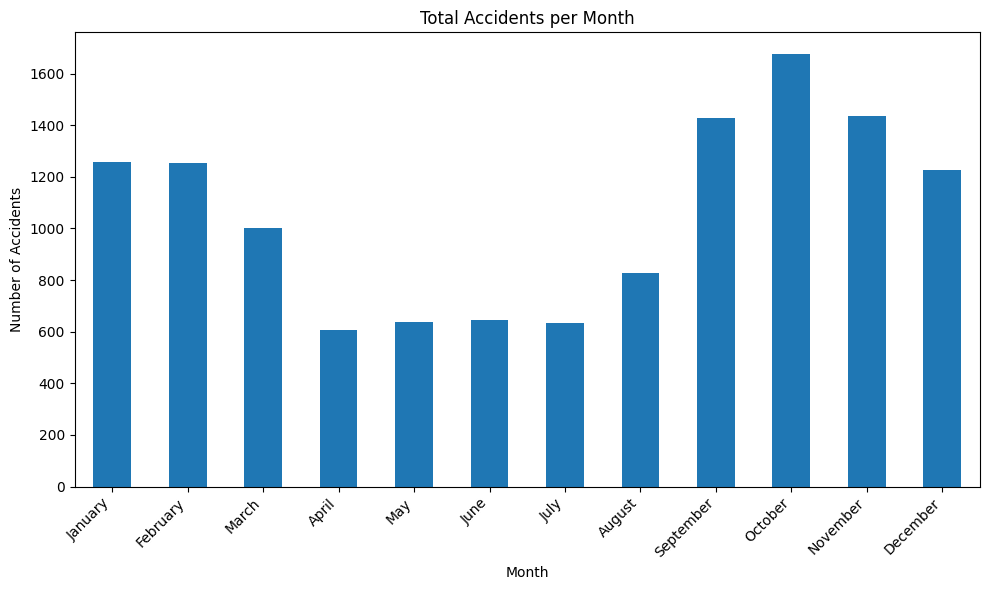

In [22]:
# Bar Chart containing total accidents per month
df['Date_datetime'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Month_Name'] = df['Date_datetime'].dt.month_name()

# Create a full list of month names in chronological order
full_month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

plt.figure(figsize=(10, 6))
df['Month_Name'].value_counts().reindex(full_month_order).plot(kind='bar')
plt.title('Total Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [23]:
df['Time']

,Time
0,7:55 AM
2,9:13 AM
4,10:27 AM
6,12:33 PM
7,12:39 PM
...,...
17305,11:10 AM
17306,12:30 PM
17307,12:59 PM
17309,3:23 PM


In [24]:
df['Time'].dtype

dtype('O')

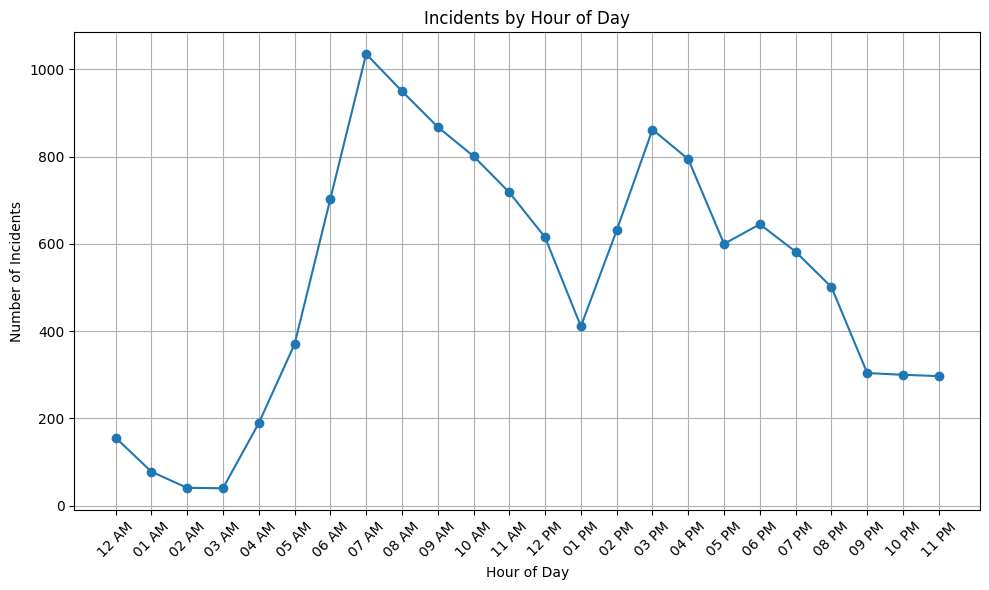

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime and extract hour
# Use the original 'Time' column with the correct format
df['Time_datetime'] = pd.to_datetime(df['Time'], format='%I:%M %p', errors='coerce')
df['Hour'] = df['Time_datetime'].dt.hour

# Group by hour and drop any potential NaNs that resulted from conversion errors
hourly_counts = df['Hour'].dropna().value_counts().sort_index()

# Hour labels in 12-hour format - only generate labels for existing hours
hour_labels = [pd.to_datetime(str(int(h)), format='%H').strftime('%I %p') for h in hourly_counts.index]

# Plot
plt.figure(figsize=(10,6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xticks(hourly_counts.index, hour_labels, rotation=45)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.title('Incidents by Hour of Day')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
import plotly.express as px

# Group by location and count incidents for size
location_counts = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

fig = px.scatter_map(location_counts, lat="Latitude", lon="Longitude", size="count", zoom=10)
# fig.update_traces(cluster=dict(enabled=True)) # Adds clusters
fig.show()

In [27]:
# Next, we'll clean the cities

df['City'].unique()

array(['Pasig City', 'Makati City', 'San Juan', 'Quezon City',
       'Mandaluyong', 'Marikina', 'Pasay City', 'Manila', 'Kalookan City',
       'ParaÃ±aque', 'Taguig', 'Navotas', 'Valenzuela', 'Malabon',
       'Parañaque'], dtype=object)

In [28]:
# Change "Kalookan City" to "Caloocan"
df.loc[df['City'] == 'Kalookan City', 'City'] = 'Caloocan'

# Change "ParaÃ±aque" to "Parañaque"
df.loc[df['City'] == 'ParaÃ±aque', 'City'] = 'Parañaque'


In [29]:
df['City'].unique()

array(['Pasig City', 'Makati City', 'San Juan', 'Quezon City',
       'Mandaluyong', 'Marikina', 'Pasay City', 'Manila', 'Caloocan',
       'Parañaque', 'Taguig', 'Navotas', 'Valenzuela', 'Malabon'],
      dtype=object)

In [30]:
# # Remove the word "City" for consistency (?)
# df['City'] = df['City'].str.replace(r'\bCity\b', '', regex=True)

In [31]:
df.to_csv("dataset_cleaned.csv")

In [32]:
df

,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source,Date_datetime,Month_Name,Time_datetime,Hour
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...,2018-08-20,August,1900-01-01 07:55:00,7.0
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...,2018-08-20,August,1900-01-01 09:13:00,9.0
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...,2018-08-20,August,1900-01-01 10:27:00,10.0
6,2018-08-20,12:33 PM,Quezon City,EDSA ORTIGAS ROBINSONS,14.592515,121.058225,1,NB,VEHICULAR ACCIDENT,1.0,CAR AND BUS,MMDA ALERT: Vehicular accident at EDSA Ortigas...,https://twitter.com/mmda/status/10314003049173...,2018-08-20,August,1900-01-01 12:33:00,12.0
7,2018-08-20,12:39 PM,Mandaluyong,EDSA LIGHT MALL,14.574014,121.048410,1,NB,MULTIPLE COLLISION,2.0,3 CARS,MMDA ALERT: Multiple collision at EDSA Light M...,https://twitter.com/mmda/status/10314025050311...,2018-08-20,August,1900-01-01 12:39:00,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17305,2020-12-27,11:10 AM,Mandaluyong,EDSA QUEZON AVE,14.582431,121.054467,1,NB,MULTIPLE COLLISION,2.0,MOTORCYCLE SUV AND TAXI,MMDA ALERT: MULTIPLE COLLISION AT EDSA QUEZON ...,https://twitter.com/mmda/status/13430359602676...,2020-12-27,December,1900-01-01 11:10:00,11.0
17306,2020-12-27,12:30 PM,Quezon City,EDSA EUGENIO LOPEZ DRIVE,14.639692,121.040453,1,SB,VEHICULAR ACCIDENT,1.0,2 MOTORCYCLE,MMDA ALERT: VEHICULAR ACCIDENT AT EDSA EUGENIO...,https://twitter.com/mmda/status/13430580429930...,2020-12-27,December,1900-01-01 12:30:00,12.0
17307,2020-12-27,12:59 PM,Manila,QUIRINO GUAZON PETRON,14.585503,120.993783,1,SB,VEHICULAR ACCIDENT,1.0,MOTORCYCLE,MMDA ALERT: VEHICULAR ACCIDENT AT QUIRINO GUAZ...,https://twitter.com/mmda/status/13430604432589...,2020-12-27,December,1900-01-01 12:59:00,12.0
17309,2020-12-27,3:23 PM,Quezon City,EDSA P TUAZON FLYOVER,14.616404,121.052548,1,SB,VEHICULAR ACCIDENT,1.0,CAR AND MOTORCYCLE,MMDA ALERT: VEHICULAR ACCIDENT AT EDSA P. TUAZ...,https://twitter.com/mmda/status/13430968412152...,2020-12-27,December,1900-01-01 15:23:00,15.0


For the dashboard itself, times with N/A values must show in "All Day" time filter